In [26]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /home/annaj/codebase/learn_d2l/chap3
/home/annaj/codebase/learn_d2l already in Python path


In [27]:
import torch

In [28]:
import importlib
import d2l.regression as regression
from d2l.regression import SyntheticRegressionDataTorch, LinearRegressionTorch

importlib.reload(regression)

<module 'd2l.regression' from '/home/annaj/codebase/learn_d2l/d2l/regression.py'>

In [29]:
rng = torch.Generator().manual_seed(42)

In [30]:
regression_data = SyntheticRegressionDataTorch(w=torch.tensor([2, -3.4]), b=4.2, rng=rng)
(x_test, y_test) = regression_data.get_test_data()

In [31]:
regression = LinearRegressionTorch(lr=0.03, num_features=2, rng=rng)
with torch.no_grad():
    print(f'Before training: w={regression.net.weight.data}, b={regression.net.bias.data}')

Before training: w=tensor([[0.0195, 0.0037]]), b=tensor([0.])


In [32]:
all_batch_losses = regression.train(regression_data.get_train_dataloader_epochs(batch_size=32, epochs=7))
with torch.no_grad():
    print(f'After training: w={regression.net.weight.data}, b={regression.net.bias.data}')
    print(f'Expected w={regression_data.w}, b={regression_data.b}')

After training: w=tensor([[ 2.0003, -3.4005]]), b=tensor([4.2001])
Expected w=tensor([ 2.0000, -3.4000]), b=4.2


Test loss: 0.000001


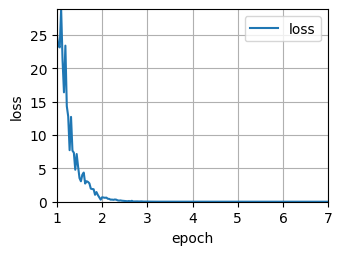

In [33]:
test_loss = regression.test(regression_data.get_test_dataloader(batch_size=regression_data.num_test))
print(f"Test loss: {test_loss:.6f}")
regression.plot_loss(all_batch_losses)